In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_rolling_statistics(dataframe, window_size, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Value'], label='Original Data')
    plt.plot(dataframe['Rolling_Mean'], label=f'Rolling Mean ({window_size} days)')
    plt.plot(dataframe['Rolling_Std'], label=f'Rolling Std ({window_size} days)')
    plt.legend()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()


# Data example

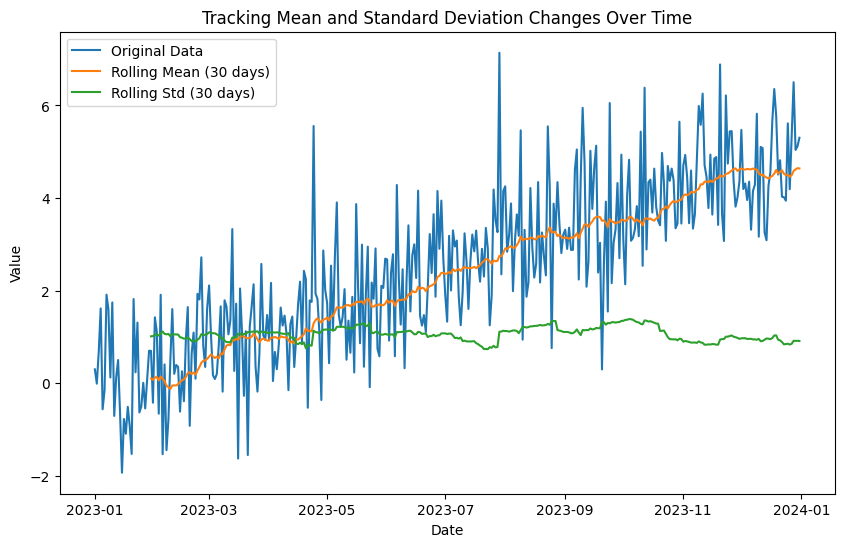

In [7]:

np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))

df = pd.DataFrame(df, columns=['Value'], index=date_rng)

window_size = 30
df['Rolling_Mean'] = df['Value'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Value'].rolling(window=window_size).std()

plot_rolling_statistics(df, window_size, 'Tracking Mean and Standard Deviation Changes Over Time')

# Shift example

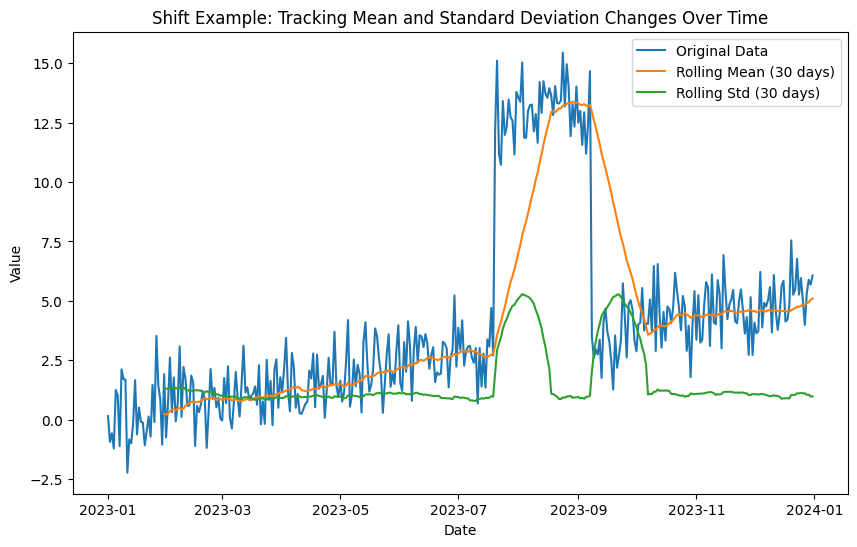

In [8]:
data_shift = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))
data_shift[200:250] += 10  # Introducing a shift

data_shift = pd.DataFrame(data_shift, columns=['Value'], index=date_rng)

window_size = 30
data_shift['Rolling_Mean'] = data_shift['Value'].rolling(window=window_size).mean()
data_shift['Rolling_Std'] = data_shift['Value'].rolling(window=window_size).std()


plot_rolling_statistics(data_shift, window_size, 'Shift Example: Tracking Mean and Standard Deviation Changes Over Time')

# Drift example

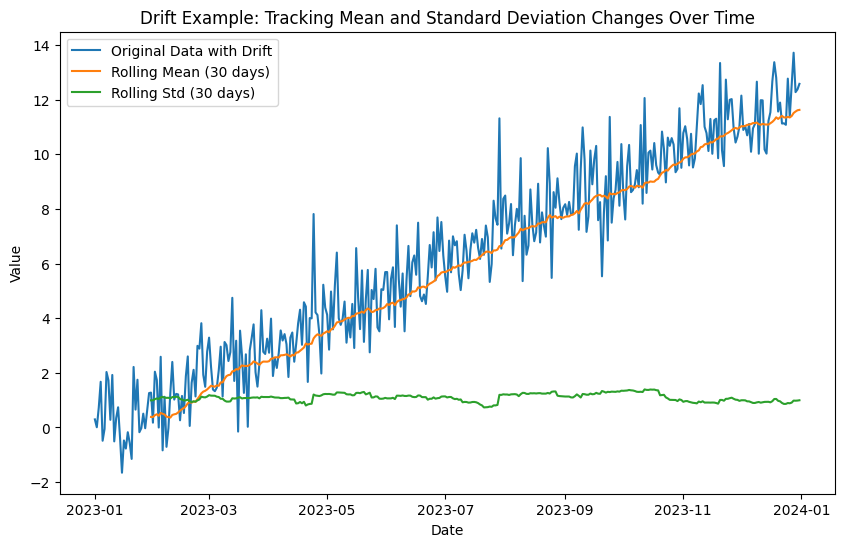

In [9]:
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_drift = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))
data_drift += 0.02 * np.arange(len(date_rng))  # Introducing a drift

df_drift = pd.DataFrame(data_drift, columns=['Value'], index=date_rng)

window_size = 30
df_drift['Rolling_Mean'] = df_drift['Value'].rolling(window=window_size).mean()
df_drift['Rolling_Std'] = df_drift['Value'].rolling(window=window_size).std()

plt.figure(figsize=(10, 6))
plt.plot(df_drift['Value'], label='Original Data with Drift')
plt.plot(df_drift['Rolling_Mean'], label=f'Rolling Mean ({window_size} days)')
plt.plot(df_drift['Rolling_Std'], label=f'Rolling Std ({window_size} days)')
plt.legend()
plt.title('Drift Example: Tracking Mean and Standard Deviation Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# Detecting shifts with p-value

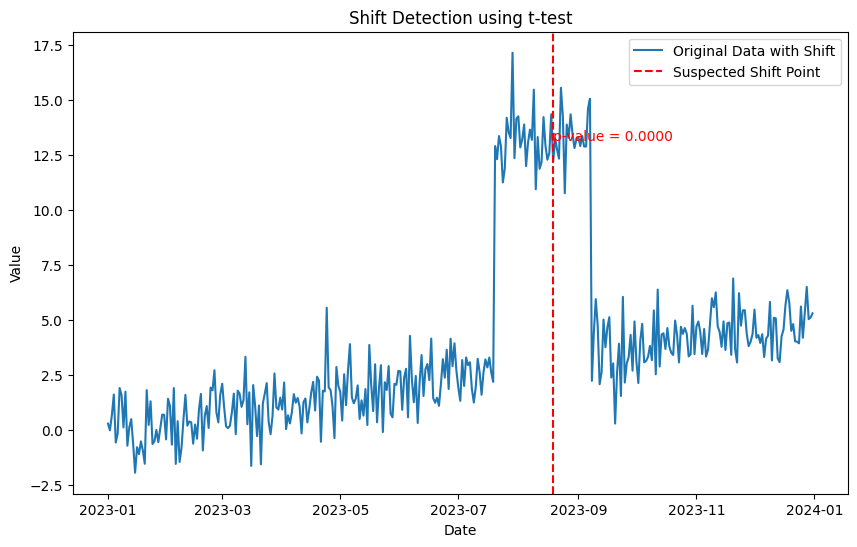

The shift at point 230 is statistically significant.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Generate dummy data with a shift
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_shift = np.random.normal(loc=0, scale=1, size=len(date_rng)) + np.linspace(0, 5, num=len(date_rng)) + np.random.normal(loc=0, scale=0.5, size=len(date_rng))
data_shift[200:250] += 10  # Introducing a shift
df_shift = pd.DataFrame(data_shift, columns=['Value'], index=date_rng)

# Define the suspected shift point
shift_point = 230

# Split the data into two segments
data_before_shift = df_shift['Value'][:shift_point]
data_after_shift = df_shift['Value'][shift_point:]

# Perform t-test
_, p_value = ttest_ind(data_before_shift, data_after_shift, alternative='two-sided')

# Set significance level (e.g., 0.05)
alpha = 0.05

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_shift.index, df_shift['Value'], label='Original Data with Shift')
plt.axvline(x=df_shift.index[shift_point], color='red', linestyle='--', label='Suspected Shift Point')

# Add p-value annotation to the plot
plt.annotate(f'p-value = {p_value:.4f}', xy=(df_shift.index[shift_point], df_shift['Value'][shift_point] + 1), color='red')

plt.legend()
plt.title('Shift Detection using t-test')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Check for significance
if p_value < alpha:
    print(f"The shift at point {shift_point} is statistically significant.")
else:
    print(f"No statistically significant shift detected at point {shift_point}.")


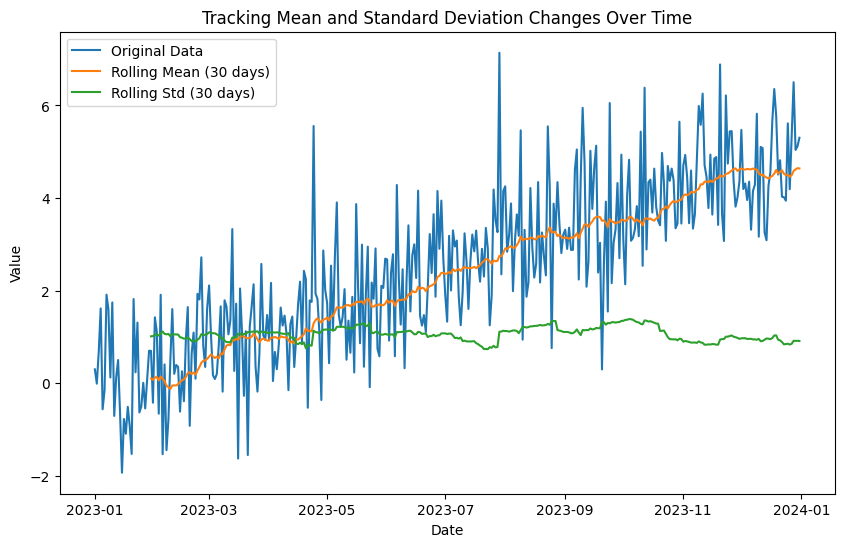

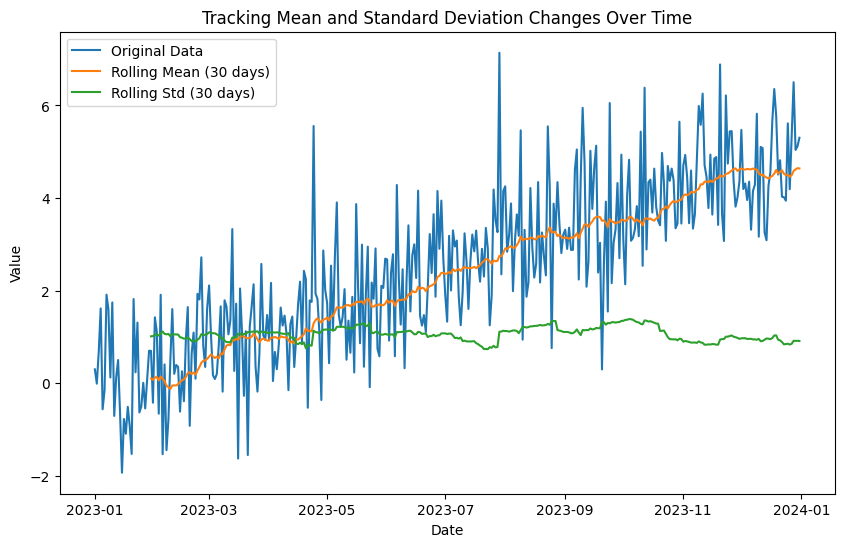